In [46]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Train data

read the data

In [2]:
train=pd.read_csv('SalaryData_Train (1).csv')

In [3]:
train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


# change the object to numeric

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

In [7]:
train['workclass']=le.fit_transform(train['workclass'])
train['age']=le.fit_transform(train['age'])
train['education']=le.fit_transform(train['education'])
train['maritalstatus']=le.fit_transform(train['maritalstatus'])
train['occupation']=le.fit_transform(train['occupation'])
train['relationship']=le.fit_transform(train['relationship'])
train['race']=le.fit_transform(train['race'])
train['sex']=le.fit_transform(train['sex'])
train['native']=le.fit_transform(train['native'])
train['Salary']=le.fit_transform(train['Salary'])

In [8]:
train.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   22          5          9           13              4           0   
1   33          4          9           13              2           3   
2   21          2         11            9              0           5   
3   36          2          1            7              2           5   
4   11          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

### check the duplicates

In [9]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157     True
30158    False
30159     True
30160    False
Length: 30161, dtype: bool

In [10]:
train.duplicated().sum()

3258

In [11]:
train[train.duplicated()]

age  workclass  education  educationno  maritalstatus  occupation  \
326     16          2          9           13              2           3   
364     10          2          9           13              4           2   
518      7          2         11            9              4           5   
525      7          2         11            9              4           2   
619     16          2          9           13              2           3   
...    ...        ...        ...          ...            ...         ...   
30110   30          2         11            9              2           2   
30118    3          2         11            9              4           6   
30132    5          2         15           10              4           0   
30157   23          2         11            9              2           6   
30159    5          2         11            9              4           0   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
326               0     4    1            0            0            40   
364               1     4    1            0            0            50   
518               4     2    0            0            0            40   
525               3     4    1            0            0            40   
619               0     4    1            0            0            40   
...             ...   ...  ...          ...          ...           ...   
30110             0     4    1            0            0            40   
30118             3     4    1            0            0            40   
30132             3     4    1            0            0            40   
30157             0     4    1            0            0            40   
30159             3     4    1            0            0            20   

       native  Salary  
326        37       1  
364        37       0  
518        37       0  
525        37       0  
619        37       1  
...       ...     ...  
30110      37       0  
30118      37       0  
30132      37       0  
30157      37       1  
30159      37       0  

[3258 rows x 14 columns]

In [12]:
train.drop_duplicates(inplace=True)

In [13]:
train.reset_index(drop=True,inplace=True)

In [14]:
train.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   22          5          9           13              4           0   
1   33          4          9           13              2           3   
2   21          2         11            9              0           5   
3   36          2          1            7              2           5   
4   11          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

In [15]:
train.duplicated().sum()

0

# null-values


In [16]:
train.isnull()

age  workclass  education  educationno  maritalstatus  occupation  \
0      False      False      False        False          False       False   
1      False      False      False        False          False       False   
2      False      False      False        False          False       False   
3      False      False      False        False          False       False   
4      False      False      False        False          False       False   
...      ...        ...        ...          ...            ...         ...   
26898  False      False      False        False          False       False   
26899  False      False      False        False          False       False   
26900  False      False      False        False          False       False   
26901  False      False      False        False          False       False   
26902  False      False      False        False          False       False   

       relationship   race    sex  capitalgain  capitalloss  hoursperweek  \
0             False  False  False        False        False         False   
1             False  False  False        False        False         False   
2             False  False  False        False        False         False   
3             False  False  False        False        False         False   
4             False  False  False        False        False         False   
...             ...    ...    ...          ...          ...           ...   
26898         False  False  False        False        False         False   
26899         False  False  False        False        False         False   
26900         False  False  False        False        False         False   
26901         False  False  False        False        False         False   
26902         False  False  False        False        False         False   

       native  Salary  
0       False   False  
1       False   False  
2       False   False  
3       False   False  
4       False   False  
...       ...     ...  
26898   False   False  
26899   False   False  
26900   False   False  
26901   False   False  
26902   False   False  

[26903 rows x 14 columns]

In [17]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

heatmap

<Axes: >

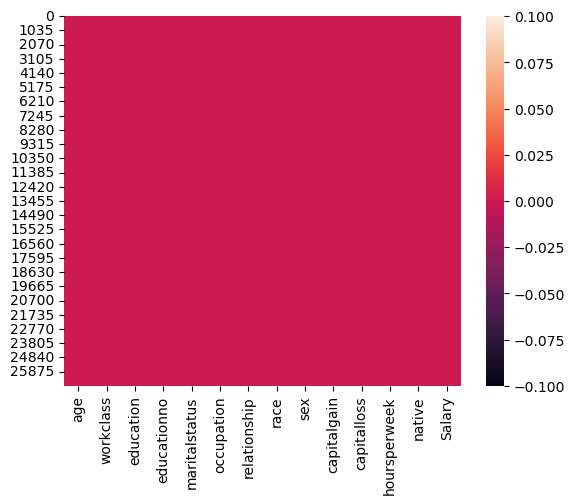

In [18]:
sns.heatmap(train.isnull())

### correlation analysis

In [19]:
train.corr()

age  workclass  education  educationno  maritalstatus  \
age            1.000000   0.075270   0.002737     0.038061      -0.245289   
workclass      0.075270   1.000000   0.021289     0.037806      -0.031961   
education      0.002737   0.021289   1.000000     0.359940      -0.040931   
educationno    0.038061   0.037806   0.359940     1.000000      -0.066536   
maritalstatus -0.245289  -0.031961  -0.040931    -0.066536       1.000000   
occupation    -0.004535   0.014047  -0.025890     0.084300       0.015094   
relationship  -0.231271  -0.070996  -0.010801    -0.092236       0.155553   
race           0.040505   0.051479   0.005572     0.035215      -0.073628   
sex            0.070475   0.079380  -0.029841     0.010941      -0.108928   
capitalgain    0.077263   0.033217   0.034550     0.126085      -0.042087   
capitalloss    0.052739   0.002739   0.020469     0.080025      -0.033890   
hoursperweek   0.072596   0.047169   0.058709     0.145491      -0.175692   
native         0.010646   0.012683   0.076605     0.096279      -0.029585   
Salary         0.223690   0.016577   0.090094     0.332178      -0.184559   

               occupation  relationship      race       sex  capitalgain  \
age             -0.004535     -0.231271  0.040505  0.070475     0.077263   
workclass        0.014047     -0.070996  0.051479  0.079380     0.033217   
education       -0.025890     -0.010801  0.005572 -0.029841     0.034550   
educationno      0.084300     -0.092236  0.035215  0.010941     0.126085   
maritalstatus    0.015094      0.155553 -0.073628 -0.108928    -0.042087   
occupation       1.000000     -0.063950  0.008183  0.066919     0.019724   
relationship    -0.063950      1.000000 -0.113708 -0.586804    -0.063322   
race             0.008183     -0.113708  1.000000  0.085786     0.020049   
sex              0.066919     -0.586804  0.085786  1.000000     0.053490   
capitalgain      0.019724     -0.063322  0.020049  0.053490     1.000000   
capitalloss      0.010873     -0.070351  0.032111  0.053084    -0.036023   
hoursperweek     0.023073     -0.248745  0.056460  0.228767     0.079403   
native           0.003024     -0.006126  0.118907 -0.004930     0.012902   
Salary           0.050711     -0.247438  0.079109  0.217360     0.228865   

               capitalloss  hoursperweek    native    Salary  
age               0.052739      0.072596  0.010646  0.223690  
workclass         0.002739      0.047169  0.012683  0.016577  
education         0.020469      0.058709  0.076605  0.090094  
educationno       0.080025      0.145491  0.096279  0.332178  
maritalstatus    -0.033890     -0.175692 -0.029585 -0.184559  
occupation        0.010873      0.023073  0.003024  0.050711  
relationship     -0.070351     -0.248745 -0.006126 -0.247438  
race              0.032111      0.056460  0.118907  0.079109  
sex               0.053084      0.228767 -0.004930  0.217360  
capitalgain      -0.036023      0.079403  0.012902  0.228865  
capitalloss       1.000000      0.049093  0.016784  0.153287  
hoursperweek      0.049093      1.000000  0.014100  0.225812  
native            0.016784      0.014100  1.000000  0.028547  
Salary            0.153287      0.225812  0.028547  1.000000

In [20]:
train.corr().sum()

age              1.182887
workclass        1.288697
education        1.562502
educationno      2.187549
maritalstatus    0.137561
occupation       1.201572
relationship    -0.650194
race             1.346039
sex              1.135698
capitalgain      1.544115
capitalloss      1.330939
hoursperweek     1.576237
native           1.349835
Salary           2.214233
dtype: float64

heatmaps

<Axes: >

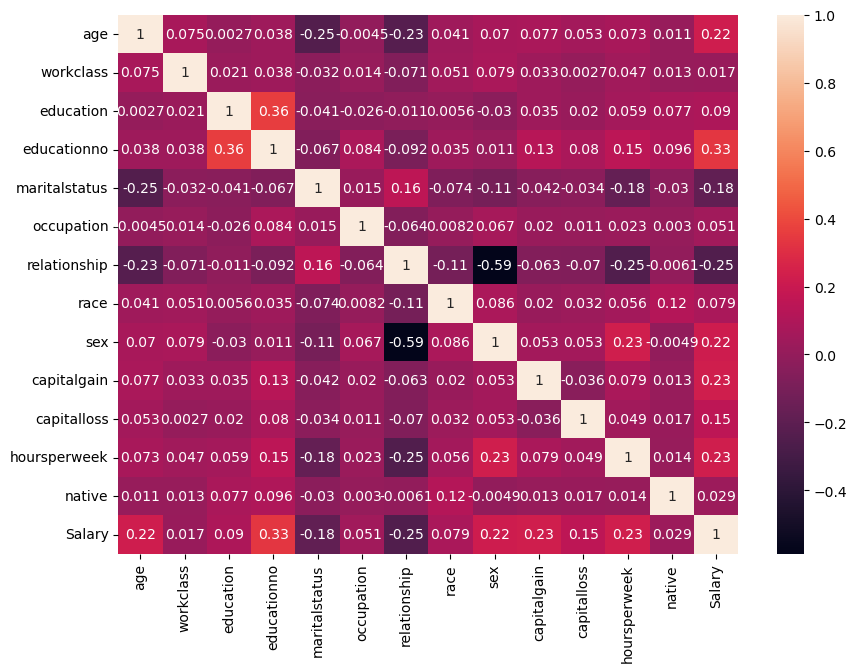

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),annot=True)

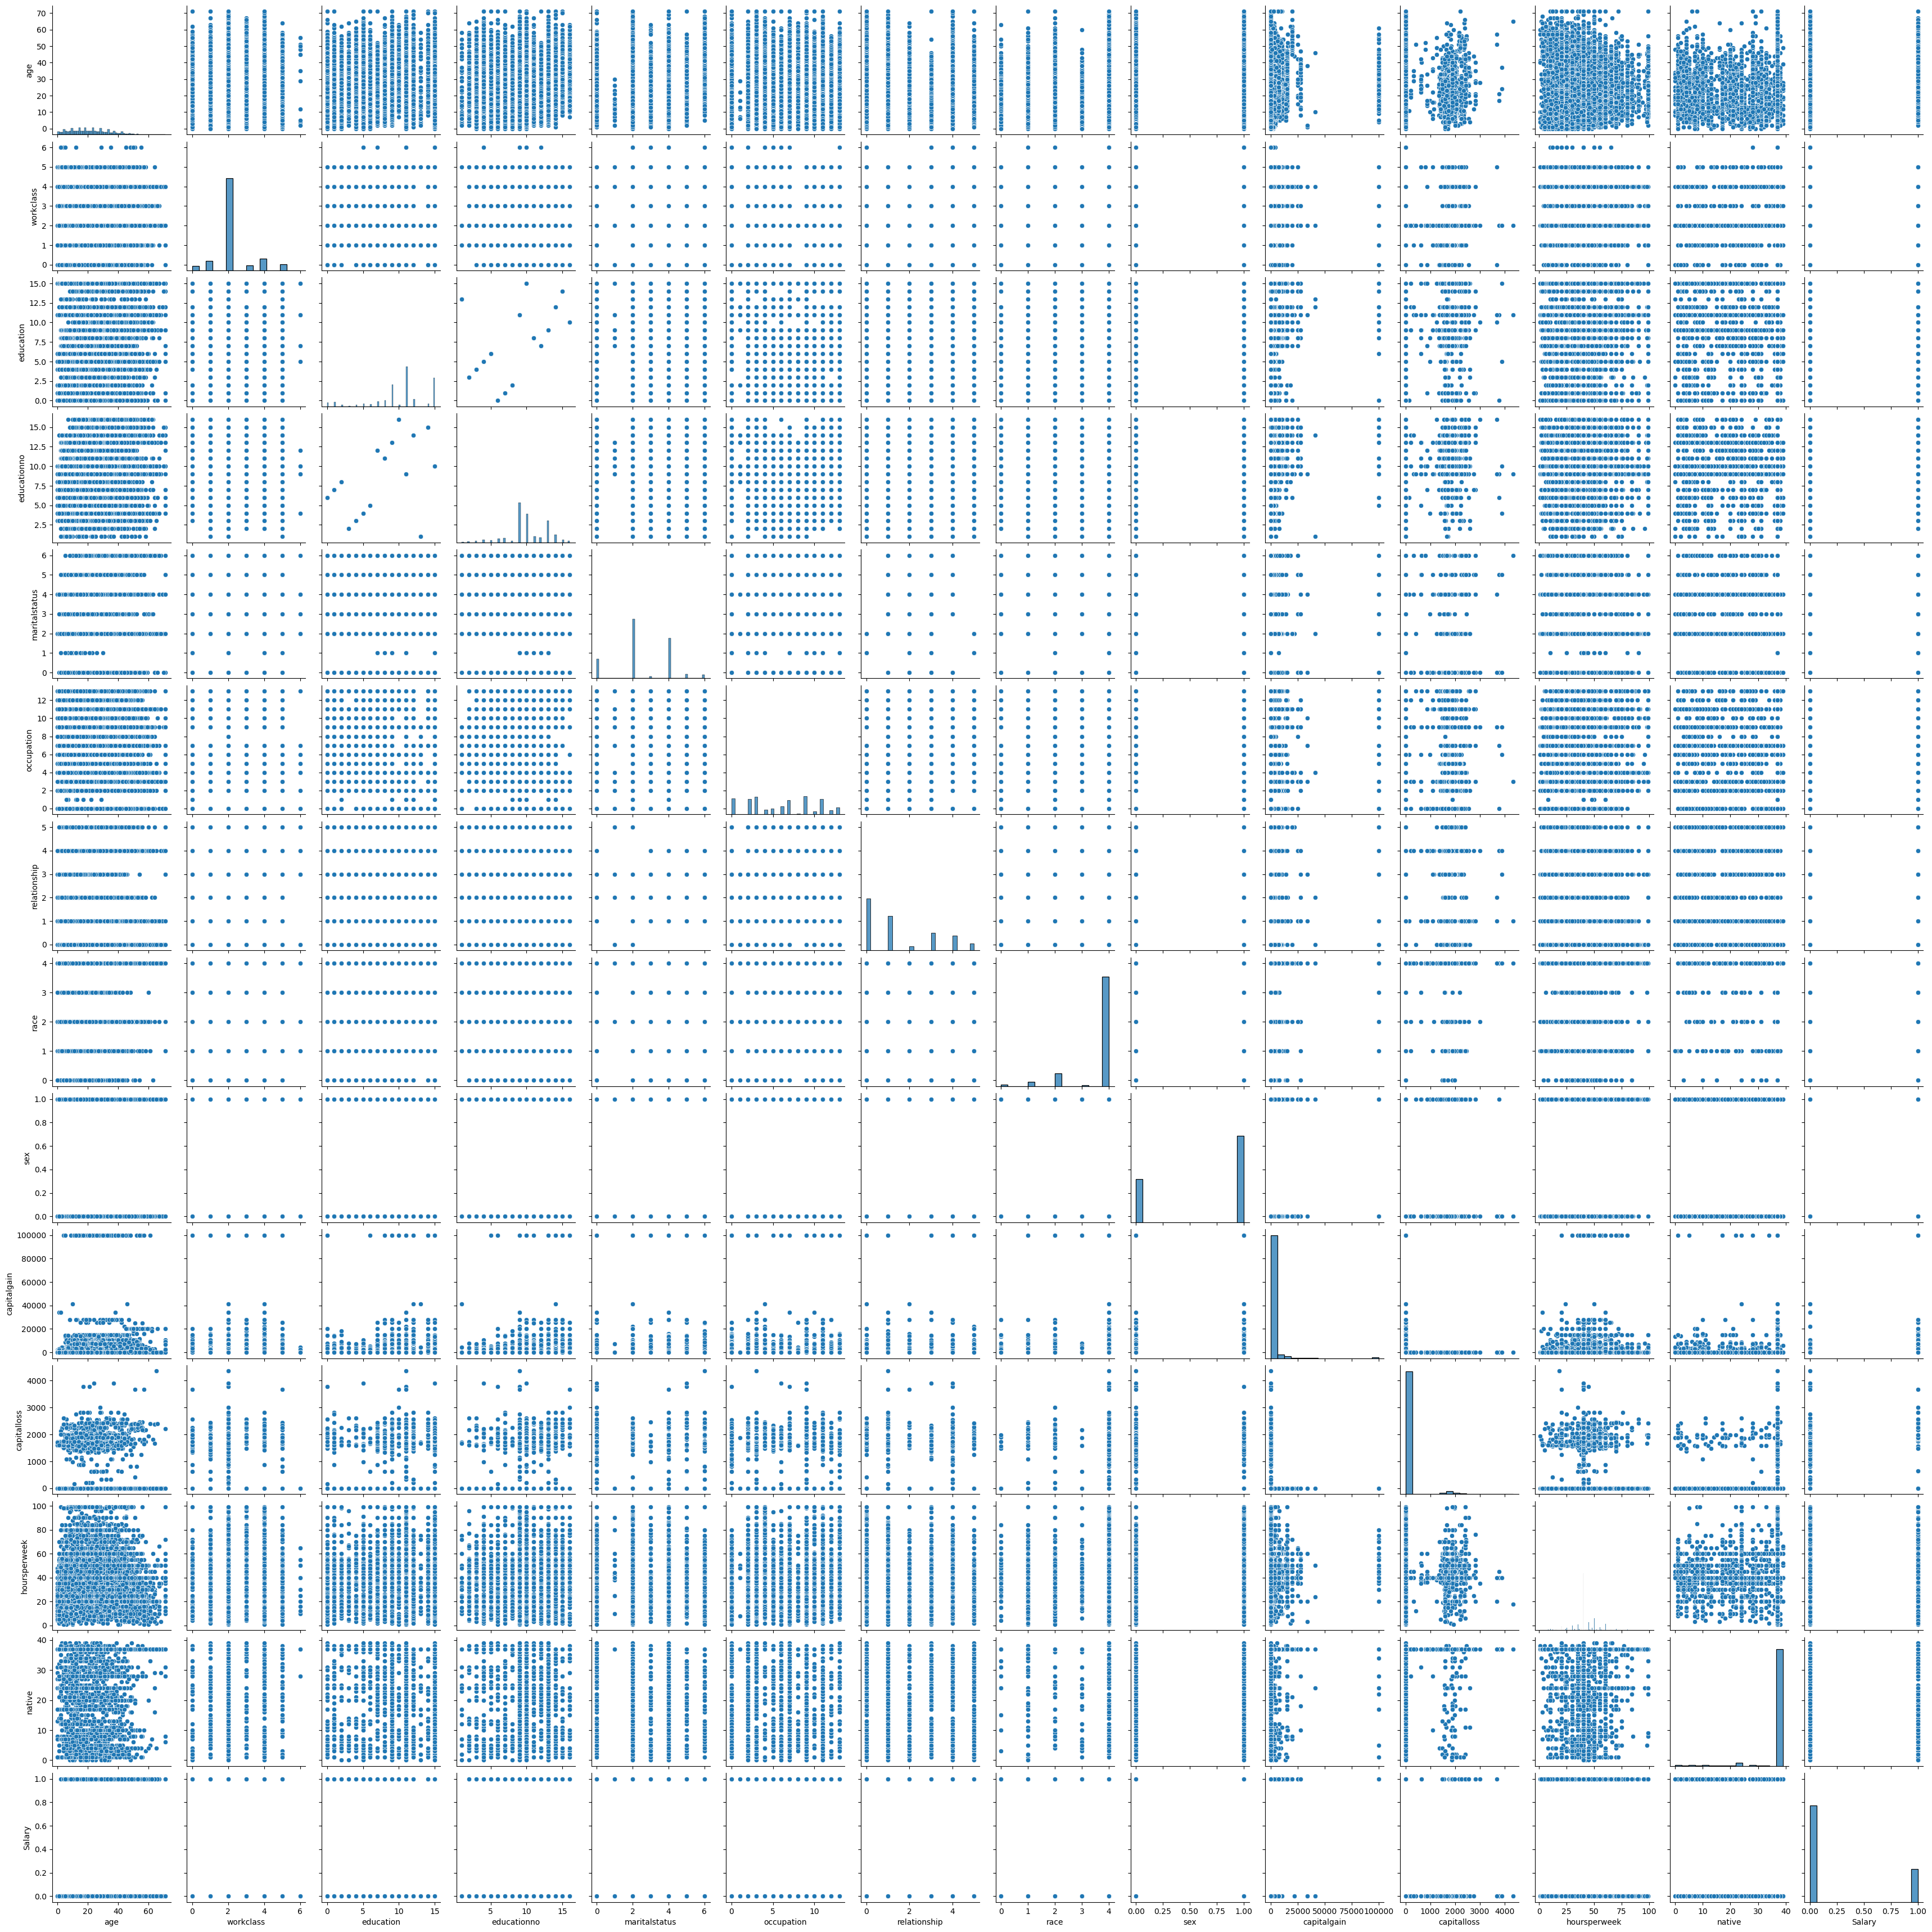

In [22]:
sns.pairplot(data=train)

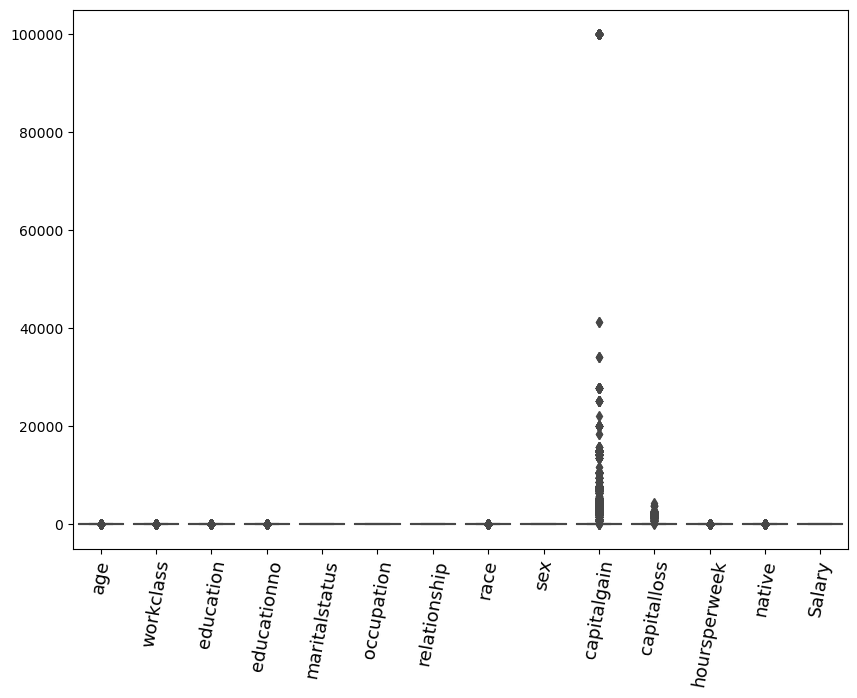

In [23]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=80,fontsize=13)
box=sns.boxplot(data=train)

# Test data 

In [24]:
test=pd.read_csv('SalaryData_Test (1).csv')

In [25]:
test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


### change the object to numeric

In [27]:
test['workclass']=le.fit_transform(test['workclass'])
test['age']=le.fit_transform(test['age'])
test['education']=le.fit_transform(test['education'])
test['maritalstatus']=le.fit_transform(test['maritalstatus'])
test['occupation']=le.fit_transform(test['occupation'])
test['relationship']=le.fit_transform(test['relationship'])
test['race']=le.fit_transform(test['race'])
test['sex']=le.fit_transform(test['sex'])
test['native']=le.fit_transform(test['native'])
test['Salary']=le.fit_transform(test['Salary'])

In [28]:
test.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0    8          2          1            7              4           6   
1   21          2         11            9              2           4   
2   11          1          7           12              2          10   
3   27          2         15           10              2           6   
4   17          2          0            6              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             3     2    1            0            0            40      37   
1             0     4    1            0            0            50      37   
2             0     4    1            0            0            40      37   
3             0     2    1         7688            0            40      37   
4             1     4    1            0            0            30      37   

   Salary  
0       0  
1       0  
2       1  
3       1  
4       0

In [29]:
test.shape

(15060, 14)

### check the duplicates

In [30]:
test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

In [31]:
test.duplicated().sum()

930

In [32]:
test[test.duplicated()]

age  workclass  education  educationno  maritalstatus  occupation  \
551     42          2         11            9              0           7   
601     15          2         11            9              2          11   
681     23          2         11            9              2           2   
799      7          2          9           13              4           9   
1044    27          2         14           15              2           9   
...    ...        ...        ...          ...            ...         ...   
15043   34          2         11            9              2           2   
15044    5          2         15           10              4           2   
15049   15          2         11            9              2           5   
15052   14          2         11            9              2           2   
15053    8          2         11            9              4           7   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
551               1     4    0            0            0            40   
601               0     4    1            0            0            40   
681               0     4    1            0            0            40   
799               1     4    1            0            0            35   
1044              0     4    1        99999            0            60   
...             ...   ...  ...          ...          ...           ...   
15043             0     4    1            0            0            40   
15044             3     4    1            0            0            40   
15049             0     4    1            0            0            40   
15052             0     4    1            0            0            40   
15053             3     4    0            0            0            40   

       native  Salary  
551        37       0  
601        37       0  
681        37       0  
799        37       0  
1044       37       1  
...       ...     ...  
15043      37       0  
15044      37       0  
15049      37       0  
15052      37       0  
15053      37       0  

[930 rows x 14 columns]

In [33]:
test.drop_duplicates(inplace=True)

In [34]:
test.reset_index(inplace=True,drop=True)

In [35]:
test.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0    8          2          1            7              4           6   
1   21          2         11            9              2           4   
2   11          1          7           12              2          10   
3   27          2         15           10              2           6   
4   17          2          0            6              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             3     2    1            0            0            40      37   
1             0     4    1            0            0            50      37   
2             0     4    1            0            0            40      37   
3             0     2    1         7688            0            40      37   
4             1     4    1            0            0            30      37   

   Salary  
0       0  
1       0  
2       1  
3       1  
4       0

In [36]:
test.duplicated().sum()

0

# null_values

In [37]:
test.isnull()

age  workclass  education  educationno  maritalstatus  occupation  \
0      False      False      False        False          False       False   
1      False      False      False        False          False       False   
2      False      False      False        False          False       False   
3      False      False      False        False          False       False   
4      False      False      False        False          False       False   
...      ...        ...        ...          ...            ...         ...   
14125  False      False      False        False          False       False   
14126  False      False      False        False          False       False   
14127  False      False      False        False          False       False   
14128  False      False      False        False          False       False   
14129  False      False      False        False          False       False   

       relationship   race    sex  capitalgain  capitalloss  hoursperweek  \
0             False  False  False        False        False         False   
1             False  False  False        False        False         False   
2             False  False  False        False        False         False   
3             False  False  False        False        False         False   
4             False  False  False        False        False         False   
...             ...    ...    ...          ...          ...           ...   
14125         False  False  False        False        False         False   
14126         False  False  False        False        False         False   
14127         False  False  False        False        False         False   
14128         False  False  False        False        False         False   
14129         False  False  False        False        False         False   

       native  Salary  
0       False   False  
1       False   False  
2       False   False  
3       False   False  
4       False   False  
...       ...     ...  
14125   False   False  
14126   False   False  
14127   False   False  
14128   False   False  
14129   False   False  

[14130 rows x 14 columns]

In [38]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

heatmap

<Axes: >

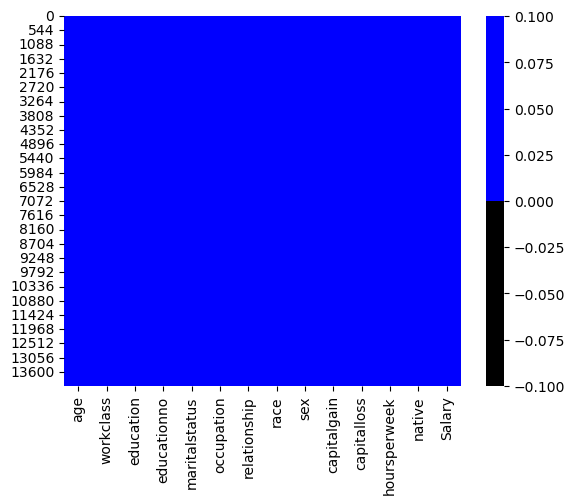

In [39]:
colors=['black','blue']
plt=sns.color_palette(colors)
sns.heatmap(test.isnull(),cmap=plt)

# correlation analysis

In [40]:
test.corr()

age  workclass  education  educationno  maritalstatus  \
age            1.000000   0.092704  -0.004169     0.021975      -0.245922   
workclass      0.092704   1.000000   0.021149     0.047708      -0.030821   
education     -0.004169   0.021149   1.000000     0.361666      -0.044471   
educationno    0.021975   0.047708   0.361666     1.000000      -0.070693   
maritalstatus -0.245922  -0.030821  -0.044471    -0.070693       1.000000   
occupation    -0.003888   0.020147  -0.017227     0.093437      -0.001040   
relationship  -0.241230  -0.063257  -0.013293    -0.080444       0.172341   
race           0.035178   0.064707   0.007635     0.030924      -0.076084   
sex            0.075138   0.062290  -0.027574     0.000603      -0.114448   
capitalgain    0.076768   0.031858   0.030424     0.132346      -0.042549   
capitalloss    0.053158   0.007808   0.024271     0.085651      -0.033647   
hoursperweek   0.088130   0.051189   0.064155     0.127779      -0.165199   
native         0.001770  -0.000432   0.075685     0.099699      -0.017963   
Salary         0.216739   0.011495   0.092476     0.326777      -0.185870   

               occupation  relationship      race       sex  capitalgain  \
age             -0.003888     -0.241230  0.035178  0.075138     0.076768   
workclass        0.020147     -0.063257  0.064707  0.062290     0.031858   
education       -0.017227     -0.013293  0.007635 -0.027574     0.030424   
educationno      0.093437     -0.080444  0.030924  0.000603     0.132346   
maritalstatus   -0.001040      0.172341 -0.076084 -0.114448    -0.042549   
occupation       1.000000     -0.054695  0.004326  0.050982     0.011623   
relationship    -0.054695      1.000000 -0.119236 -0.580247    -0.056609   
race             0.004326     -0.119236  1.000000  0.087171     0.016730   
sex              0.050982     -0.580247  0.087171  1.000000     0.047180   
capitalgain      0.011623     -0.056609  0.016730  0.047180     1.000000   
capitalloss      0.012946     -0.051241  0.020725  0.048382    -0.033929   
hoursperweek     0.014548     -0.257082  0.041720  0.227884     0.089512   
native           0.003006      0.003405  0.120543 -0.017165     0.008189   
Salary           0.046633     -0.254418  0.073101  0.212100     0.225871   

               capitalloss  hoursperweek    native    Salary  
age               0.053158      0.088130  0.001770  0.216739  
workclass         0.007808      0.051189 -0.000432  0.011495  
education         0.024271      0.064155  0.075685  0.092476  
educationno       0.085651      0.127779  0.099699  0.326777  
maritalstatus    -0.033647     -0.165199 -0.017963 -0.185870  
occupation        0.012946      0.014548  0.003006  0.046633  
relationship     -0.051241     -0.257082  0.003405 -0.254418  
race              0.020725      0.041720  0.120543  0.073101  
sex               0.048382      0.227884 -0.017165  0.212100  
capitalgain      -0.033929      0.089512  0.008189  0.225871  
capitalloss       1.000000      0.056353  0.002473  0.147563  
hoursperweek      0.056353      1.000000  0.008654  0.219184  
native            0.002473      0.008654  1.000000  0.016104  
Salary            0.147563      0.219184  0.016104  1.000000

In [41]:
test.corr().sum()

age              1.166349
workclass        1.316545
education        1.570726
educationno      2.177428
maritalstatus    0.143636
occupation       1.180799
relationship    -0.596006
race             1.307441
sex              1.072297
capitalgain      1.537415
capitalloss      1.340514
hoursperweek     1.566829
native           1.303970
Salary           2.147754
dtype: float64

heat map

<Axes: >

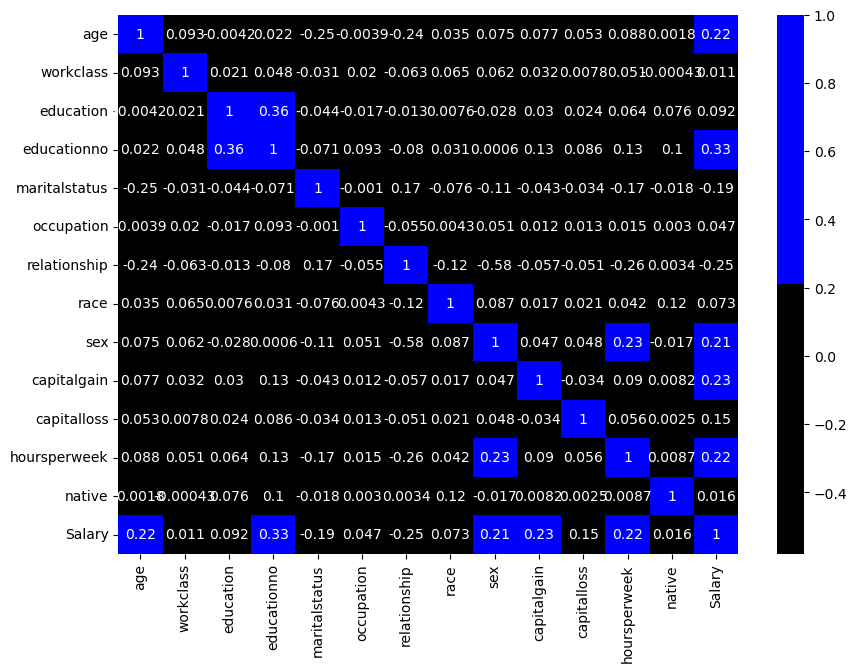

In [44]:
plt.figure(figsize=(10,7))
colors=['black','blue']
plt=sns.color_palette(colors)
sns.heatmap(test.corr(),cmap=plt,annot=True)

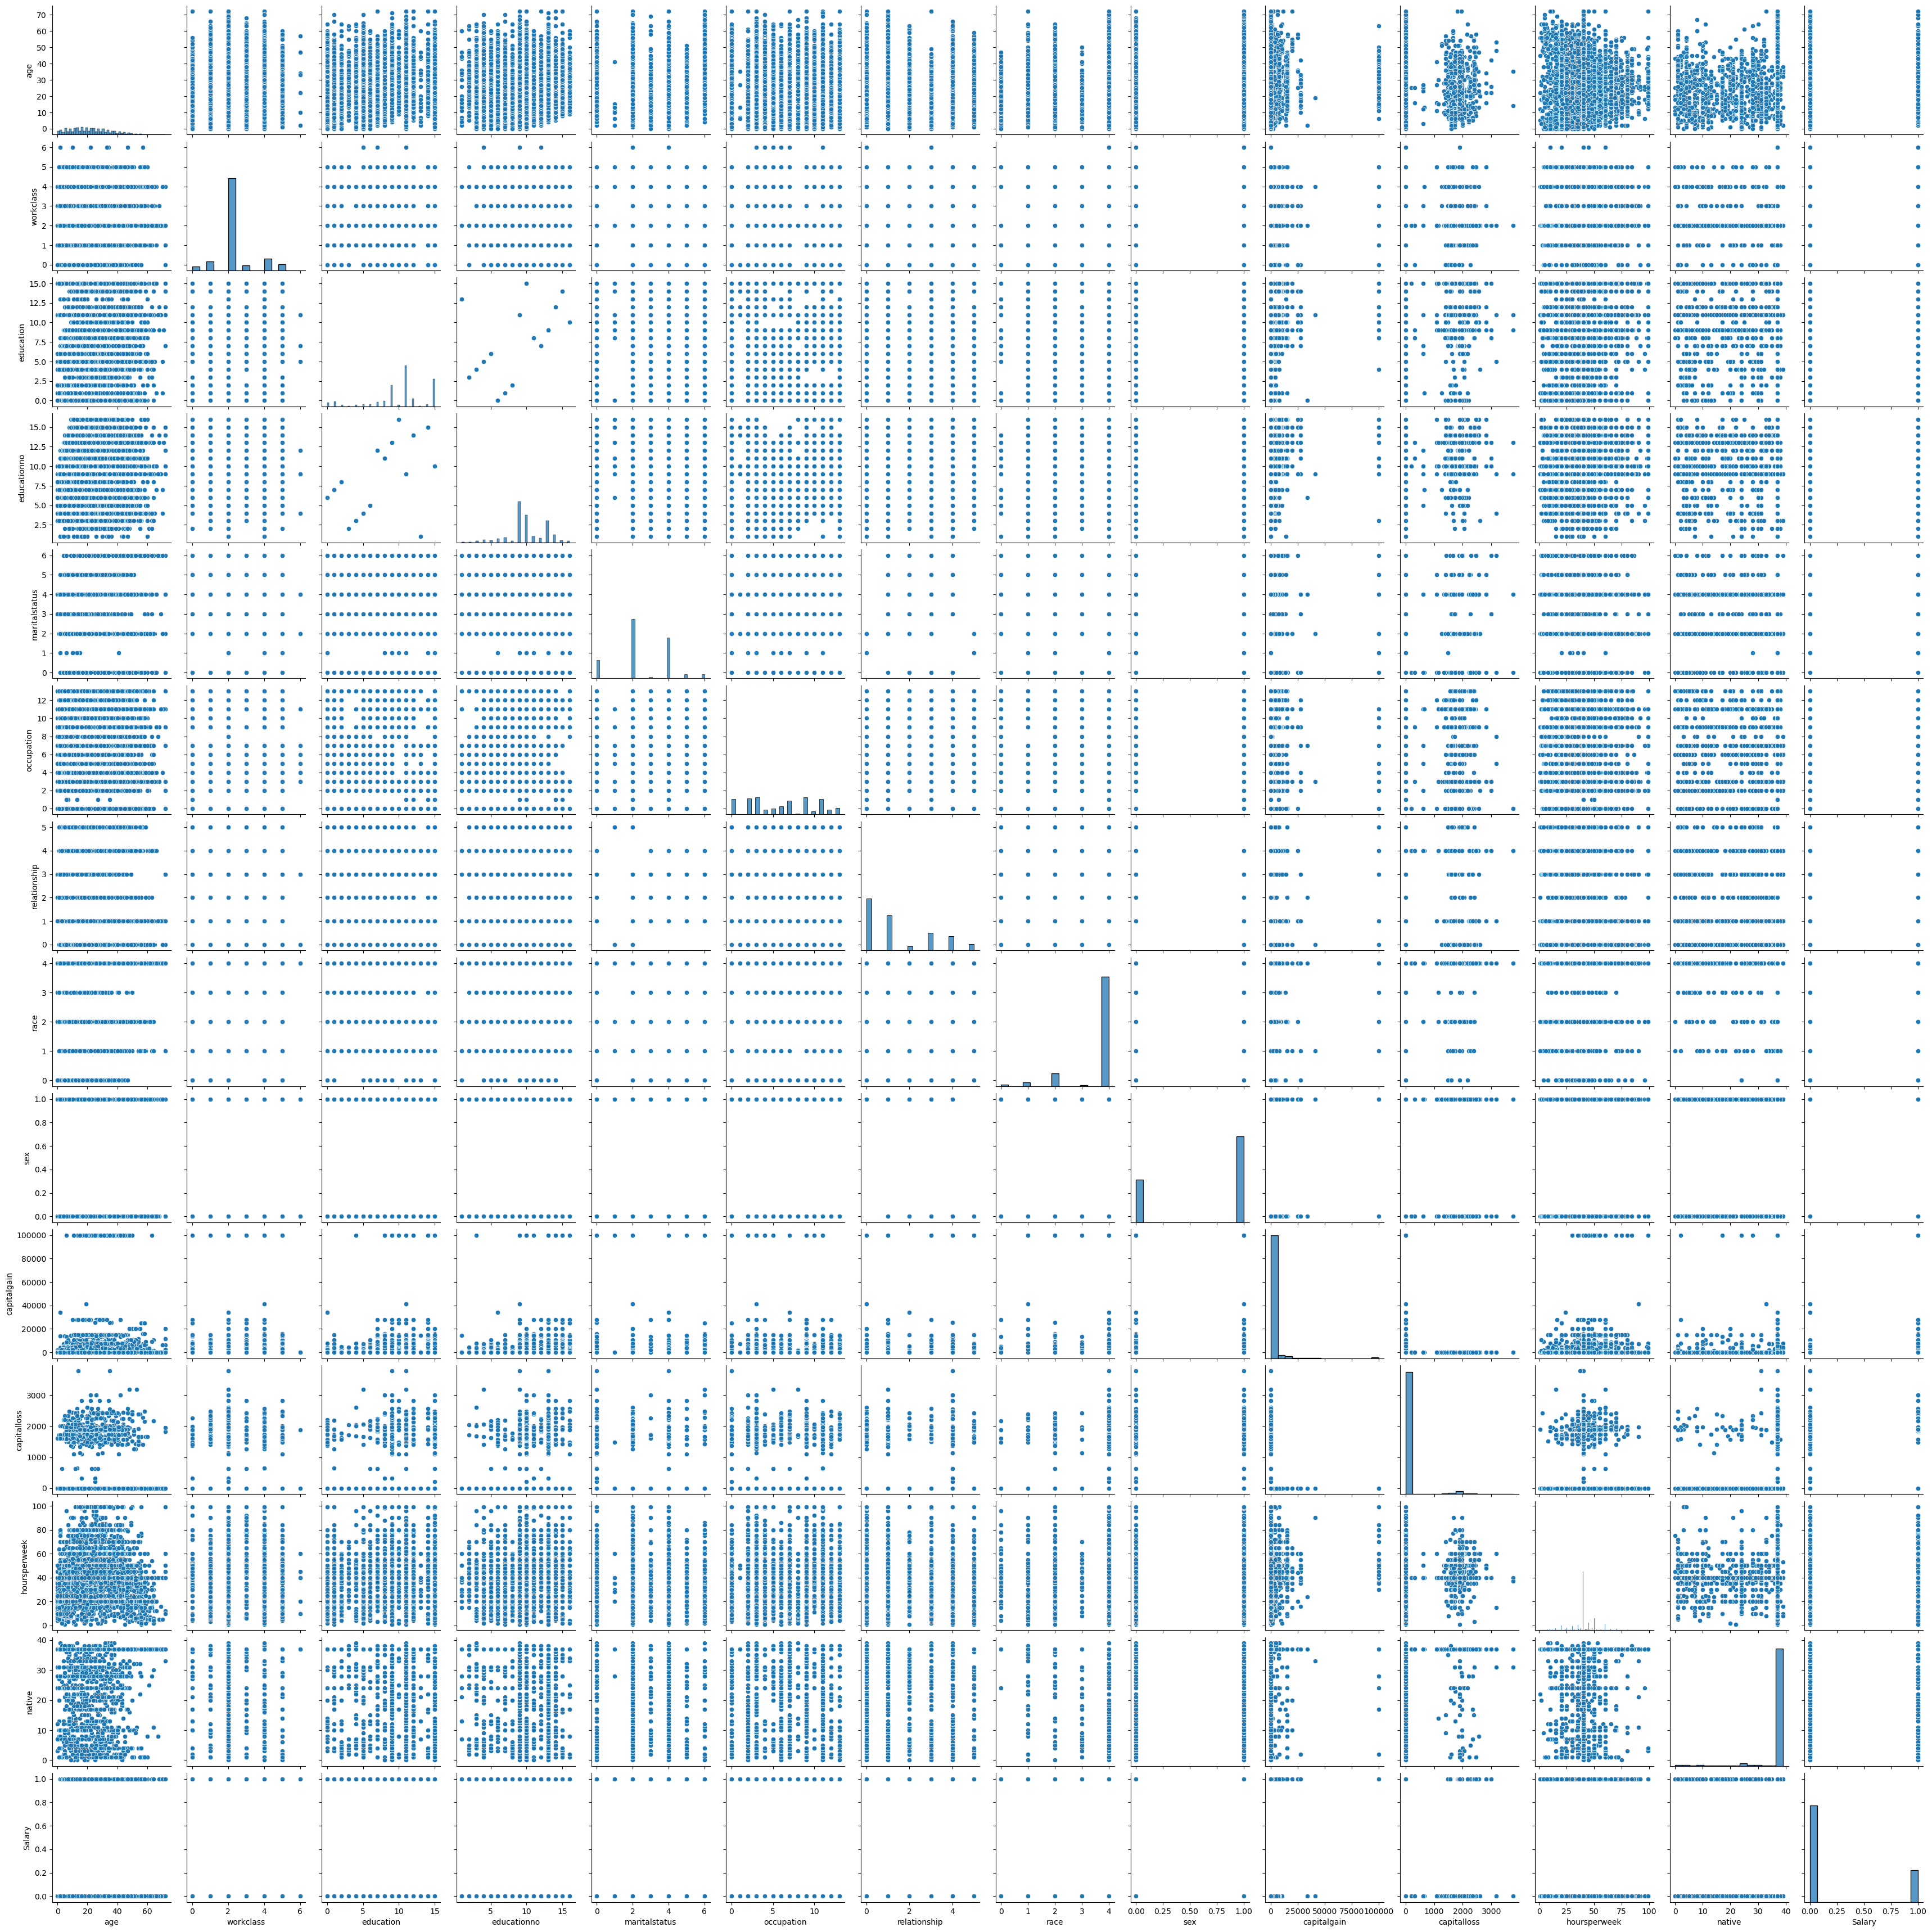

In [48]:
sns.pairplot(test)

<Axes: >

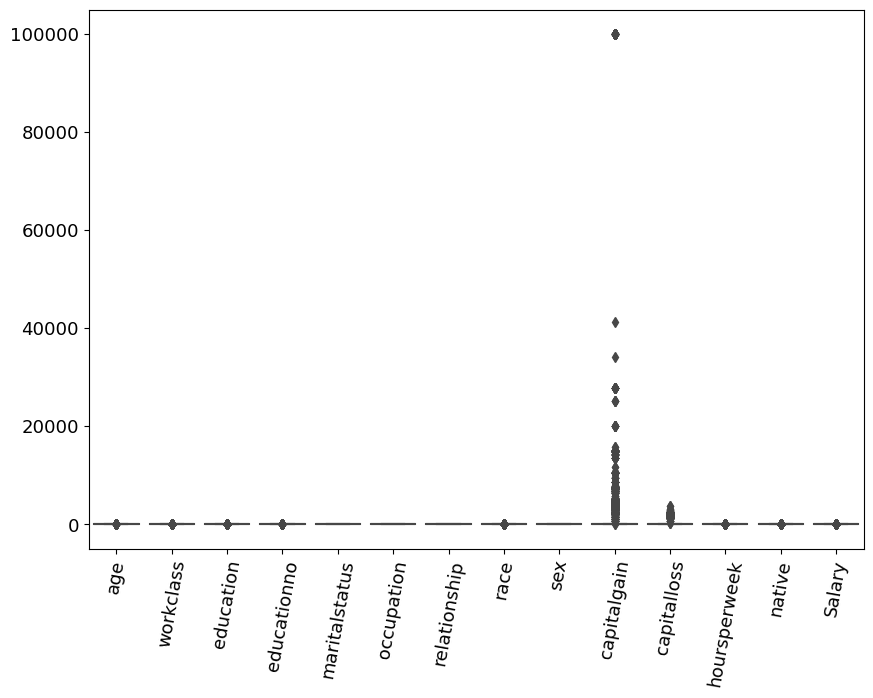

In [47]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=80,fontsize=13)
plt.yticks(fontsize=13)
sns.boxplot(test)

# join the train and test data

In [49]:
salary_data=pd.concat([train,test])

In [50]:
salary_data.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   22          5          9           13              4           0   
1   33          4          9           13              2           3   
2   21          2         11            9              0           5   
3   36          2          1            7              2           5   
4   11          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

### split the data 

In [66]:
X=salary_data.iloc[:,0:13]
y=salary_data.iloc[:,13]

In [67]:
X.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   22          5          9           13              4           0   
1   33          4          9           13              2           3   
2   21          2         11            9              0           5   
3   36          2          1            7              2           5   
4   11          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
0             1     4    1         2174            0            40      37  
1             0     4    1            0            0            13      37  
2             1     4    1            0            0            40      37  
3             0     2    1            0            0            40      37  
4             5     2    0            0            0            40       4

In [68]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int32

# build the model

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
model = GaussianNB()

In [71]:
model.fit(X,y)

GaussianNB()

In [72]:
predicted= model.predict(X)

In [73]:
print ("Predicted Value:", predicted)

Predicted Value: [0 0 0 ... 0 1 0]




### ROC

In [74]:
from sklearn.metrics import roc_curve,roc_auc_score

In [75]:
train_proba=model.predict_proba(X)

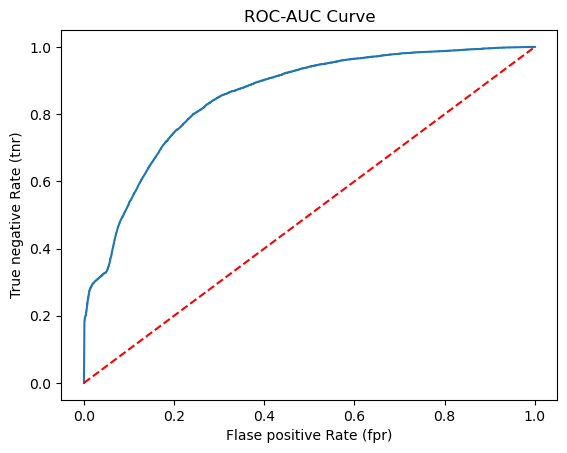

In [76]:
fpr,tpr,thresh=roc_curve(y,train_proba[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC-AUC Curve')
plt.xlabel('Flase positive Rate (fpr)')
plt.ylabel('True negative Rate (tnr)')
plt.show()

.

# PCA

In [78]:
from sklearn.decomposition import PCA

In [79]:
model=PCA(n_components=6)

In [80]:
model.fit_transform(X)

array([[ 9.68913911e+02, -9.52261242e+01, -4.23846825e-01,
        -9.94573720e-01, -1.77291194e+00, -5.51155794e+00],
       [-1.20508412e+03, -9.93993576e+01,  2.28765878e-01,
        -2.99048161e+01, -2.08392749e+00, -2.48222294e+00],
       [-1.20508229e+03, -9.93788777e+01, -8.98144745e-01,
        -4.53386748e-01, -1.77998032e+00, -1.16879029e+00],
       ...,
       [-1.20508082e+03, -9.93607848e+01,  2.82342734e+00,
         8.91274294e+00, -1.72642336e+00,  3.21506720e+00],
       [ 4.24990851e+03, -8.89539099e+01,  3.66590790e+00,
        -3.12233006e+00, -1.69139491e+00, -5.61887746e+00],
       [-1.20507995e+03, -9.93507988e+01,  3.75835851e+00,
         1.92573193e+01, -1.60541642e+00, -2.64582883e+00]])

In [81]:
pc_comps=model.fit_transform(X)

In [82]:
pc_comps

array([[ 9.68913911e+02, -9.52261242e+01, -4.23846825e-01,
        -9.94573720e-01, -1.77291194e+00, -5.51155794e+00],
       [-1.20508412e+03, -9.93993576e+01,  2.28765878e-01,
        -2.99048161e+01, -2.08392749e+00, -2.48222294e+00],
       [-1.20508229e+03, -9.93788777e+01, -8.98144745e-01,
        -4.53386748e-01, -1.77998032e+00, -1.16879029e+00],
       ...,
       [-1.20508082e+03, -9.93607848e+01,  2.82342734e+00,
         8.91274294e+00, -1.72642336e+00,  3.21506720e+00],
       [ 4.24990851e+03, -8.89539099e+01,  3.66590790e+00,
        -3.12233006e+00, -1.69139491e+00, -5.61887746e+00],
       [-1.20507995e+03, -9.93507988e+01,  3.75835851e+00,
         1.92573193e+01, -1.60541642e+00, -2.64582883e+00]])

In [83]:
var=model.explained_variance_ratio_
var

array([9.97094966e-01, 2.89841876e-03, 2.90788078e-06, 2.37054116e-06,
       6.27248645e-07, 2.64418333e-07])

In [84]:
np.cumsum(var)

array([0.99709497, 0.99999338, 0.99999629, 0.99999866, 0.99999929,
       0.99999956])

In [85]:
pc_comps[:,0:3]

array([[ 9.68913911e+02, -9.52261242e+01, -4.23846825e-01],
       [-1.20508412e+03, -9.93993576e+01,  2.28765878e-01],
       [-1.20508229e+03, -9.93788777e+01, -8.98144745e-01],
       ...,
       [-1.20508082e+03, -9.93607848e+01,  2.82342734e+00],
       [ 4.24990851e+03, -8.89539099e+01,  3.66590790e+00],
       [-1.20507995e+03, -9.93507988e+01,  3.75835851e+00]])

TSNE plot

In [59]:
from sklearn.manifold import TSNE

In [77]:
model = TSNE(n_components=2)
tsne_comps = model.fit_transform(X)

In [86]:
tsne_comps

array([[ 57.205673 , -82.171745 ],
       [-14.356562 ,  62.073105 ],
       [  5.4453998, -68.90328  ],
       ...,
       [-19.287691 , -50.512817 ],
       [114.43631  , -30.567375 ],
       [-75.33986  , -55.55855  ]], dtype=float32)

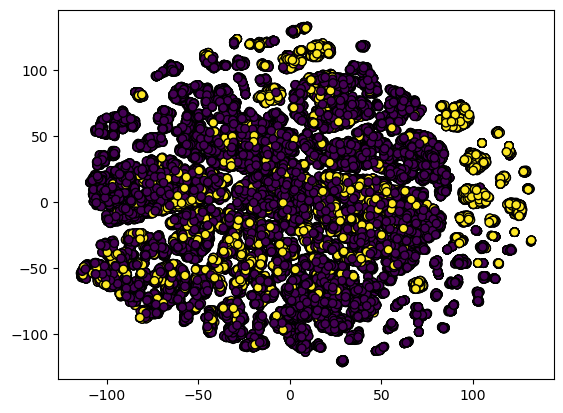

In [61]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y,cmap='viridis',edgecolor='k')
plt.show()